####  Рабцевич Ксения Руслановна, ИУ5-62Б

## Рубежный контроль №1

### Тема: Технологии разведочного анализа и обработки данных. 

Вариант 18. Номер задачи №3. Номер набора данных №2.

Задача №3.
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака.

##### Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных [FiveThirtyEight Comic Characters Dataset](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset?select=dc-wikia-data.csv)

Набор данных содержит колонки:
- page_id - уникальный идентификатор страницы с персонажами в вики
- name - имя персанажа
- urlslug - уникальный URL-адрес вики, который приведет вас к персонажу
- ID - статус личности персонажа
- ALIGN - персонаж хороший, плохой или нейтральный
- EYE - цвет глаз персонажа
- HAIR - цвет волос персонажа
- SEX - пол персонажа (например, мужской, женский и т. д.)
- GSM - персонаж принадлежит к полу или сексуальному меньшинству (например, гомосексуальные персонажи, бисексуальные персонажи)
- ALIVE - персонаж жив или умер
- APPEARANCES - количество появлений персонажа в комиксах (по состоянию на 2 сентября 2014 г.)
- FIRST APPEARANCE - месяц и год первого появления персонажа в комиксе, если таковой имеется
- YEAR - год первого появления персонажа в комиксе, если таковой имеется

##### Импорт библиотек и загрузка данных

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [40]:
data = pd.read_csv('dc-wikia.csv', sep=",")

##### Основные характеристики датасета 

In [41]:
# Первые 5 строк датасета
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [42]:
# Размер датасета
data.shape

(6896, 13)

In [43]:
# Список колонок с типами данных
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [44]:
# Проверим наличие пустых значений
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [45]:
# Основные статистические характеристки набора данных
data.describe()

,page_id,APPEARANCES,YEAR
count,6896.000000,6541.000000,6827.000000
mean,147441.209252,23.625134,1989.766662
std,108388.631149,87.378509,16.824194
min,1380.000000,1.000000,1935.000000
25%,44105.500000,2.000000,1983.000000
50%,141267.000000,6.000000,1992.000000
75%,213203.000000,15.000000,2003.000000
max,404010.000000,3093.000000,2013.000000


##### Масштабирование данных (для одного признака)

In [46]:
# импорт
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

##### - MinMax масштабирование

In [47]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['YEAR']])

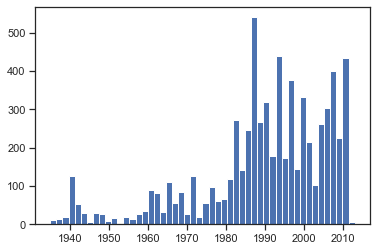

In [48]:
plt.hist(data['YEAR'], 50)
plt.show()

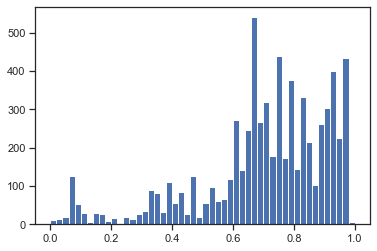

In [49]:
plt.hist(sc1_data, 50)
plt.show()

##### - Масштабирование данных на основе Z-оценки

In [50]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['YEAR']])

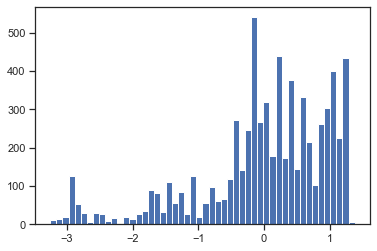

In [51]:
plt.hist(sc2_data, 50)
plt.show()

##### Преобразование категориальных признаков в количественные (label encoding, one hot encoding) для одного признака

In [52]:
cat_temp_data = data[['SEX']]

In [53]:
cat_temp_data['SEX'].unique()

array(['Male Characters', 'Female Characters', nan,
       'Genderless Characters', 'Transgender Characters'], dtype=object)

In [54]:
#обработка пропусков
from sklearn.impute import SimpleImputer

In [55]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
np.unique(data_imp2)

array(['Female Characters', 'Genderless Characters', 'Male Characters',
       'Transgender Characters'], dtype=object)

##### - label encoding

In [56]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Male Characters
1,Male Characters
2,Male Characters
3,Male Characters
4,Male Characters
...,...
6891,Female Characters
6892,Male Characters
6893,Male Characters
6894,Male Characters


In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [58]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [59]:
np.unique(cat_enc_le)

array([0, 1, 2, 3])

In [60]:
le.inverse_transform([ 0,  1,  2,  3])

array(['Female Characters', 'Genderless Characters', 'Male Characters',
       'Transgender Characters'], dtype=object)

##### - one-hot encoding

In [61]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [62]:
cat_enc.shape

(6896, 1)

In [63]:
cat_enc_ohe.shape

(6896, 4)

In [64]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.]])

In [65]:
cat_enc.head(10)

,c1
0,Male Characters
1,Male Characters
2,Male Characters
3,Male Characters
4,Male Characters
5,Female Characters
6,Male Characters
7,Male Characters
8,Female Characters
9,Male Characters


#####  Гистограмма

Позволяет оценить плотность вероятности распределения данных.

C:\Users\kenia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YEAR', ylabel='Density'>

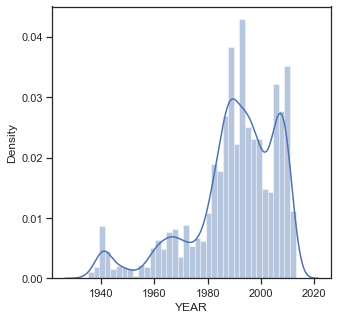

In [66]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(data['YEAR'])